In [48]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# After downloading the data and storing it in the same folder as your Jupyter file, we will read in the data.
data = pd.read_csv("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")

# We are going to clean up some unneccessary columns for better visualization of what the data looks like
data.drop(data[(data['UNIT_NUM'] == 0) | (data['UNIT_NUM'] == 1) | (data['YEAR'] < 1980)].index, inplace=True)

del data['INDICATOR']
del data['FLAG']
del data['UNIT']
del data['STUB_NAME_NUM']
del data['YEAR_NUM']
del data['UNIT_NUM']

data.head(19)

,STUB_NAME,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,AGE_NUM,ESTIMATE
698,Total,All persons,0.0,1980,All ages,0.0,11.9
728,Total,All persons,0.0,1981,All ages,0.0,12.0
817,Total,All persons,0.0,1982,All ages,0.0,12.2
818,Total,All persons,0.0,1983,All ages,0.0,12.1
819,Total,All persons,0.0,1984,All ages,0.0,12.4
820,Total,All persons,0.0,1985,All ages,0.0,12.4
821,Total,All persons,0.0,1986,All ages,0.0,12.9
822,Total,All persons,0.0,1987,All ages,0.0,12.7
823,Total,All persons,0.0,1988,All ages,0.0,12.4
824,Total,All persons,0.0,1989,All ages,0.0,12.2


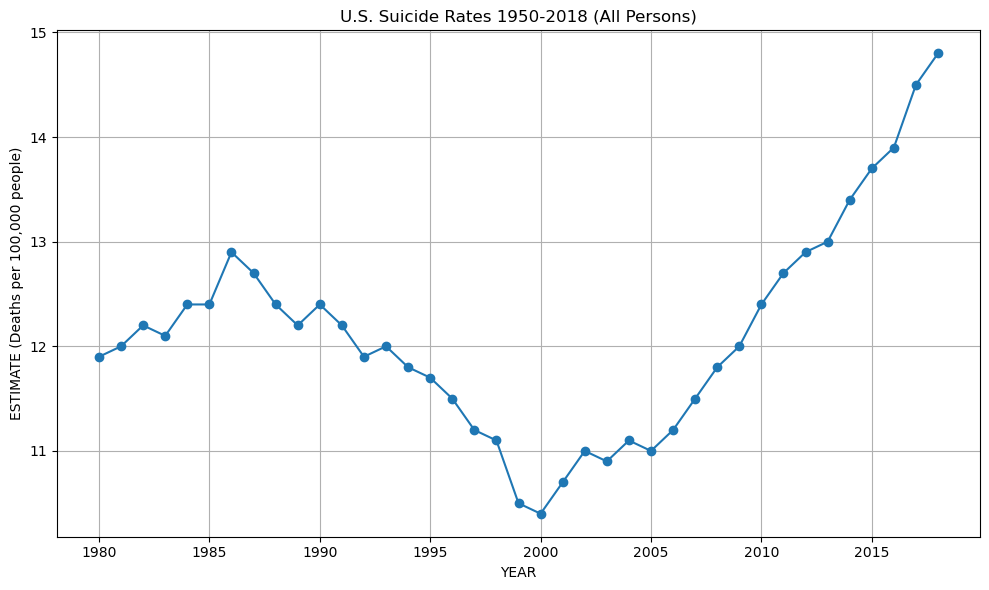

In [61]:
# Our first data visualization: Estimate vs Year for the 'All Persons' demographic category so we can get a general sense of the suicide rates
all_persons_data = data[data['STUB_LABEL'] == 'All persons'].copy()

all_persons_data.sort_values(by='YEAR', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(all_persons_data['YEAR'], all_persons_data['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1950-2018 (All Persons)')

plt.xticks(range(min(all_persons_data['YEAR']),max(all_persons_data['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
'''
Hmm, looks interesting enough, but this alone does not give us much to work with.
Maybe mention missing data from 1950 to 1980 if we choose to go down this route
Let's now visualize suicide rates (Estimate) by age group with a box plot.
'''

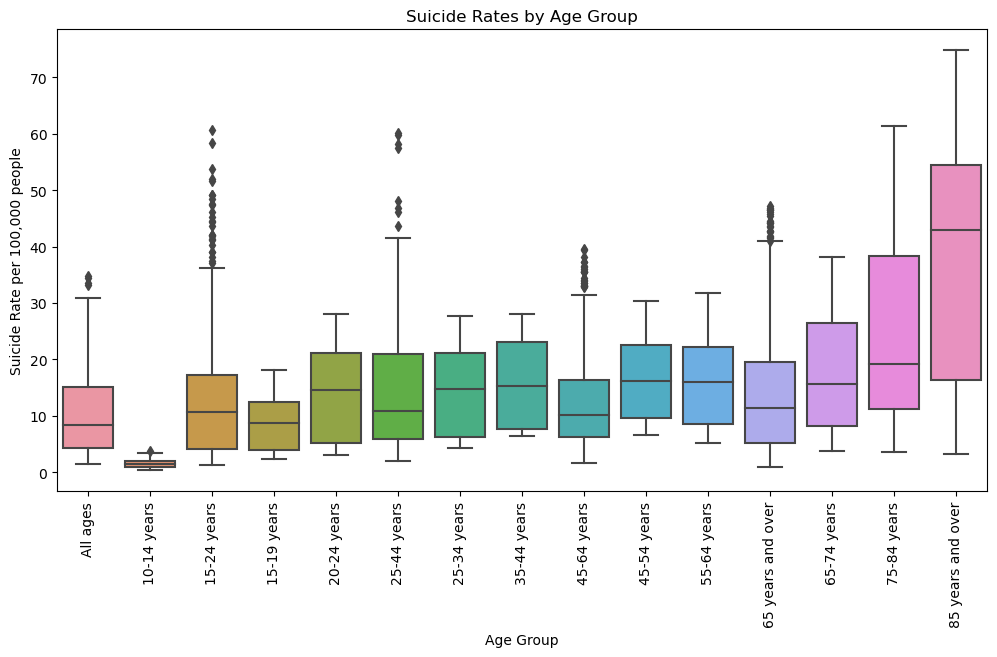

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='AGE', y='ESTIMATE')
plt.title('Suicide Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate per 100,000 people')
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''
As you can see in the above box plot, it seems that across all years, suicide rates seem to increase the older the
age group is. There is also a very clear rise in rates at the final "85 and older" age group, in which the mean
suicide rate sits at over 40 per 100,000 individuals, which is more than double the suicide rate of the previous
group, "75-84 years".
'''

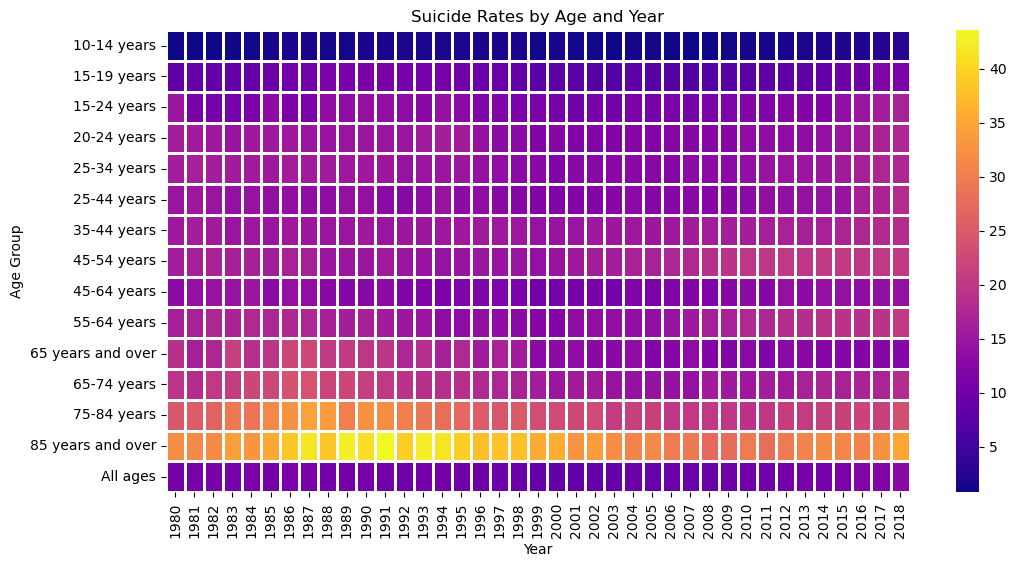

In [65]:
'''
Looking at age groups we can start to notice that age could be a strong factor for suicide rate.
Let's combine age and year using a heatmap to look at 2 attributes of the Suicide Rates from 1950 to 2018.
'''

pivot_table = data.pivot_table(values='ESTIMATE', index='AGE', columns='YEAR', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='plasma', linecolor='white', linewidths=1)
plt.title('Suicide Rates by Age and Year')
plt.xlabel('Year')
plt.ylabel('Age Group')
plt.show()

In [ ]:
'''
As you can see in the above heat map, it once again shows how apparently high the suicide rate is for the "85 and
older" age group, glowing a bright yellow for all years. what is more important to note through this map, however,
is the noticable rise in suicide rates for younger age groups since the 1990's. This rise can mainly be seen 
consistently across groups of "15-24 years" up to "45-54 years", which is could be evident of many factors and 
events throughout the years, including economic factors such as the stock market crash of 2008, as well as social
factors such as the rise of social media and the internet in the early 2000's, which would mainly affect younger
people. While these are all possibilities, it is impossible to know the direct cause of the increase through 
this data alone.
'''

In [ ]:
'''
Now that we've analyzed suicide rates based on age, let's now look at the effect of dividing the data based on sex.

Firstly, we will visualize the suicide rates of men over time
'''

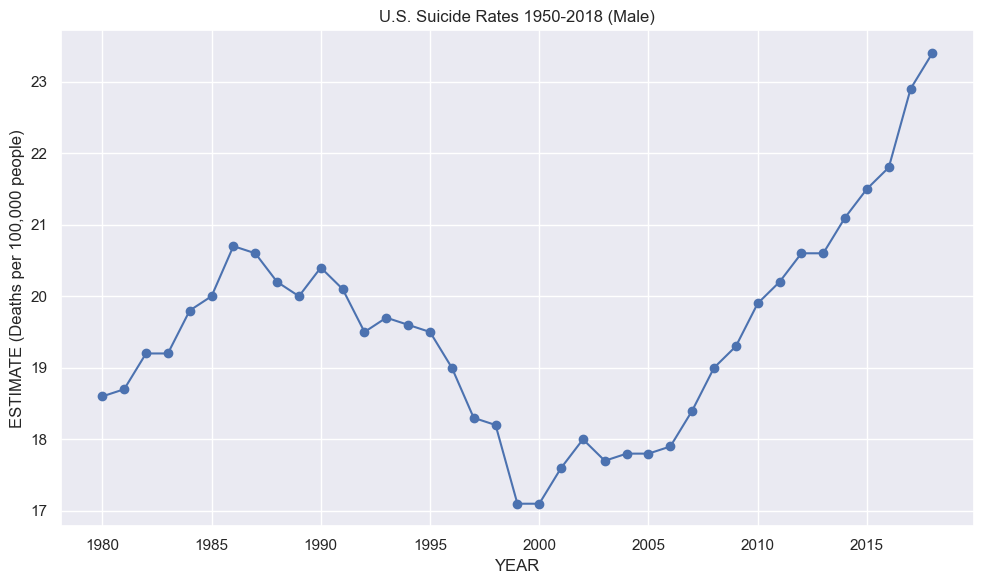

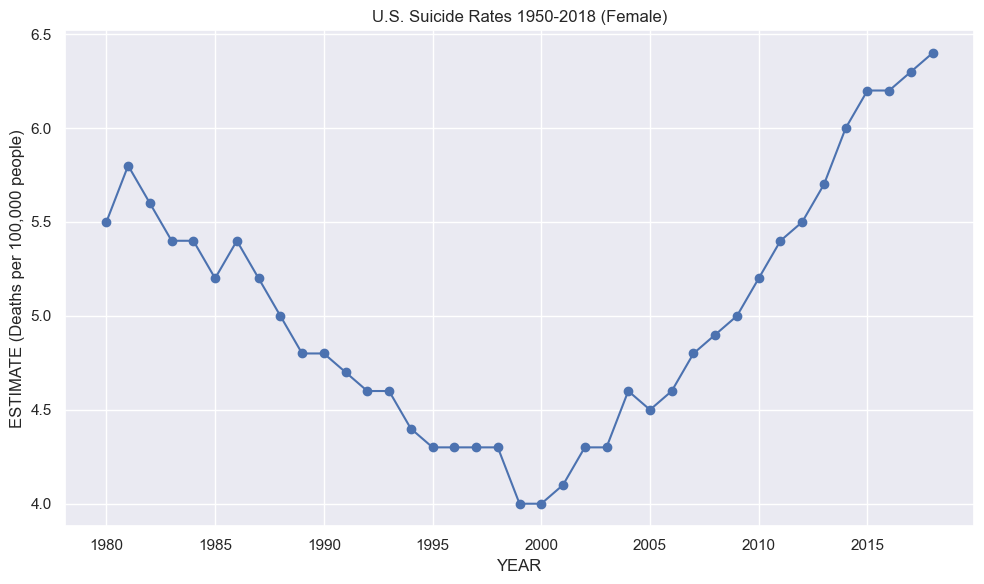

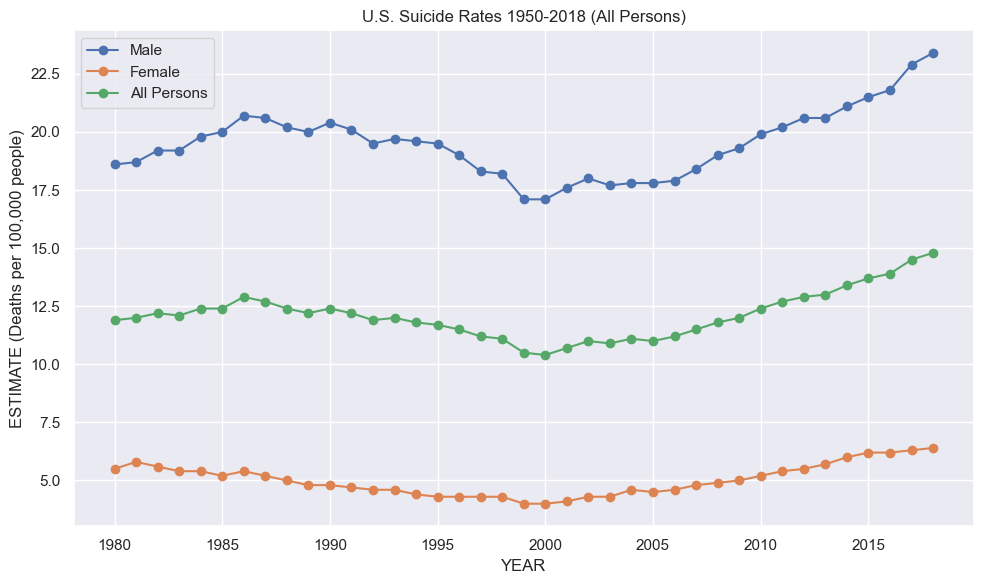

In [97]:
male_data = data[data['STUB_LABEL'] == 'Male'].copy()

male_data.sort_values(by='YEAR', inplace=True)

female_data = data[data['STUB_LABEL'] == 'Female'].copy()

female_data.sort_values(by='YEAR', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(male_data['YEAR'], male_data['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1950-2018 (Male)')

plt.xticks(range(min(male_data['YEAR']),max(male_data['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(female_data['YEAR'], female_data['ESTIMATE'], marker='o')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1950-2018 (Female)')

plt.xticks(range(min(female_data['YEAR']),max(female_data['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(male_data['YEAR'], male_data['ESTIMATE'], marker='o', label='Male')
plt.plot(female_data['YEAR'], female_data['ESTIMATE'], marker='o', label='Female')
plt.plot(all_persons_data['YEAR'], all_persons_data['ESTIMATE'], marker='o', label='All Persons')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1950-2018 (All Persons)')

plt.xticks(range(min(all_persons_data['YEAR']),max(all_persons_data['YEAR']) + 1, 5))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

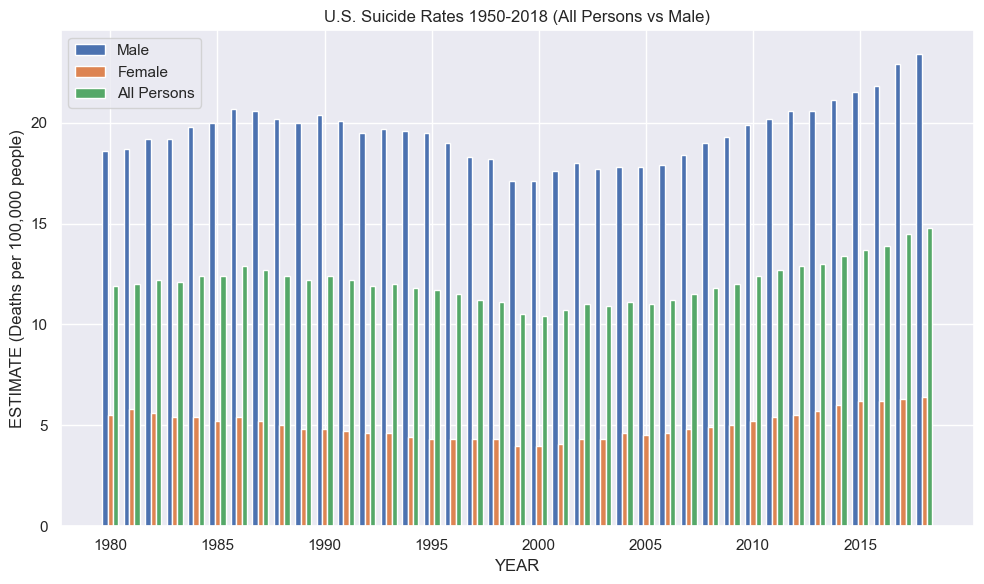

In [90]:
bar_width = .25

bar_positions_male = male_data['YEAR'].values - bar_width
bar_positions_female = female_data['YEAR'].values
bar_positions_all = all_persons_data['YEAR'].values + bar_width

plt.figure(figsize=(10,6))
plt.bar(bar_positions_male, male_data['ESTIMATE'], width=bar_width, label='Male')
plt.bar(bar_positions_female, female_data['ESTIMATE'], width=bar_width, label='Female')
plt.bar(bar_positions_all, all_persons_data['ESTIMATE'], width=bar_width, label='All Persons')
plt.xlabel('YEAR')
plt.ylabel('ESTIMATE (Deaths per 100,000 people)')
plt.title('U.S. Suicide Rates 1950-2018 (All Persons vs Male)')

plt.xticks(range(min(all_persons_data['YEAR']),max(all_persons_data['YEAR']) + 1, 5))

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



In [ ]:
'''
As you can see in the above plots, there is a very clear divide in the suicide rates of men compared to women. On
one side of the coin, men have an exceedingly high suicide rate, averaging consistently around 20 people per 
100,000. On the other hand, women seem to fall fairly under the rate set by the general "all persons" group, as
their suicide rates seem to hover around 5 people per 100,000. The change in rate also seems to be more volatile 
with men as compared to women. 
'''

In [ ]:
'''
One more category in which we are also going to check suicide rates is rates based on race. We will specifically be
comparing White, African American, Asian and Pacific Islander, and Hispanic rates.
'''